# Convolutional Neural Network 
Esc+M
Shift+Enter

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, #ImageDataGenerator-->Class;tool that apply all transformation images of train set
                                   shear_range = 0.2, #rescale-->feature scaling,output value will be between 0-1
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set', #dataset/training_set->path of the folder dataset
                                                 target_size = (64, 64), #Will be fed
                                                 batch_size = 32,
                                                 class_mode = 'binary') #class_mode-->as the output type binary
#Image augmentation has been done here->If we didn't do here after training training set accuracy would be high,overfitted and test set accuracy would be low.

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64), #have to be same as training set
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential() #will allow to create ANN as a sequence of layers.Keras->Library,Models->module

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) #layers->module,Conv2D->Class
#input_shape-->input dataset dimension

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
#pool_size-->the size of specific frame from feature map to creat pooled featured map
#strides-->sliding/shifting size


### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) #kernal_size-->feature detector dimension
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten()) #flatting to one dim vector

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Dense-->Class;units-->number of hidden neurons

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #unit=1-->One output;sigmoid-->recommend for binary classsification
#softmax-->multiclass classification

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#accuracy-->relevant way to measure the performance of classification method

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
h=cnn.fit(x = training_set, validation_data = test_set, epochs = 25) #fit()-->method;train cnn on trainning set
#validation_data-->to evaluate test set
#batch_size(32) * 250=8000 total train image;250->steps in each epoch;first accuracy->training set,second accuracy->test set

Epoch 1/25
250/250 [==============================] - 46s 131ms/step - loss: 0.6675 - accuracy: 0.5928 - val_loss: 0.6336 - val_accuracy: 0.6345
Epoch 2/25
250/250 [==============================] - 20s 81ms/step - loss: 0.6232 - accuracy: 0.6589 - val_loss: 0.5854 - val_accuracy: 0.7080
Epoch 3/25
250/250 [==============================] - 20s 80ms/step - loss: 0.5903 - accuracy: 0.6836 - val_loss: 0.5450 - val_accuracy: 0.7315
Epoch 4/25
250/250 [==============================] - 21s 83ms/step - loss: 0.5521 - accuracy: 0.7159 - val_loss: 0.5409 - val_accuracy: 0.7360
Epoch 5/25
250/250 [==============================] - 26s 102ms/step - loss: 0.5221 - accuracy: 0.7390 - val_loss: 0.5236 - val_accuracy: 0.7430
Epoch 6/25
250/250 [==============================] - 20s 81ms/step - loss: 0.5025 - accuracy: 0.7491 - val_loss: 0.5140 - val_accuracy: 0.7590
Epoch 7/25
250/250 [==============================] - 25s 101ms/step - loss: 0.4824 - accuracy: 0.7678 - val_loss: 0.4844 - val_accura

## Part 4 - Making a single prediction

In [14]:
import numpy as np
from keras.preprocessing import image #image-->submodule 
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64)) #load_img-->specific function of image submodule
test_image = image.img_to_array(test_image) #img_to_array-->converting test image(pil formate) to numpy array
test_image = np.expand_dims(test_image, axis = 0) #expand_dims()-->to add extra dim corresponding to batch
result = cnn.predict(test_image)                  #axix=0-->dim of batch whice are adding image will be the first dimension
training_set.class_indices
if result[0][0] == 1: #batch index zero,only one element(test image) that also index zero
  prediction = 'dog'
else:
  prediction = 'cat'

In [15]:
print(prediction)

dog


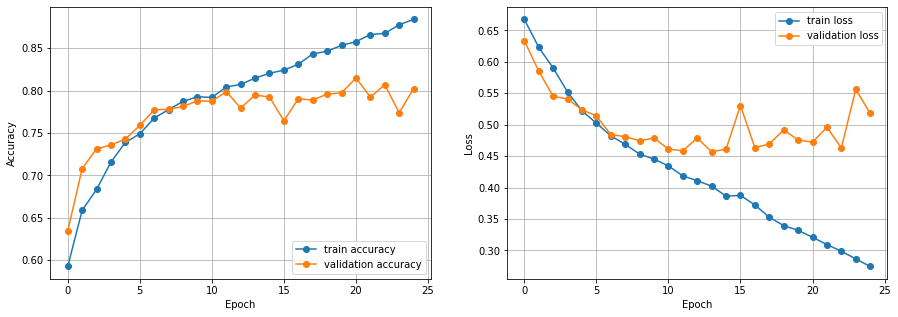

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()